# **OpenCV를 이용한 외곽선 검출(Edge Detection)**

## **1. 외곽선 검출 방법**

### 1-1. 외곽선 검출이란?

- 이미지 내에서 개체 또는 영역의 경계(외곽선, 가장자리)를 식별하는 데 사용되는 이미지 처리 기술
- 외곽선 검출
    - 이미지와 관련된 가장 중요한 기능 중 하나
    - 외곽선을 통해 이미지의 기본 구조를 알수 있으므로
    - 컴퓨터 비전 처리 파이프라인은 애플리케이션에서 에지 감지를 광범위하게 사용하고 있음

### 1-2. 외곽선은 어떻게 검출하는가?

- 픽셀 강도의 급격한 변화가 외곽선을 만듦
- 따라서 외곽선을 감지하기 위해서는 인접 픽셀에서 이러한 변화를 찾아야 함

- 대표적인 외곽선 검출 알고리즘
    - Sobel Edge Detection
    - Canny Edge Detection

## **2. OpenCV 및 관련 라이브러리 가져오기**

- 필요한 라이브러리 가져오기

In [1]:
import cv2
from google.colab.patches import cv2_imshow

- 실습용 데이터 복사하기

In [2]:
# Google Drive Mount
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
!cp '/gdrive/My Drive/Resources/tiger.jpg' .

## **3. 이미지 읽어오기**

### 3-1. 전처리

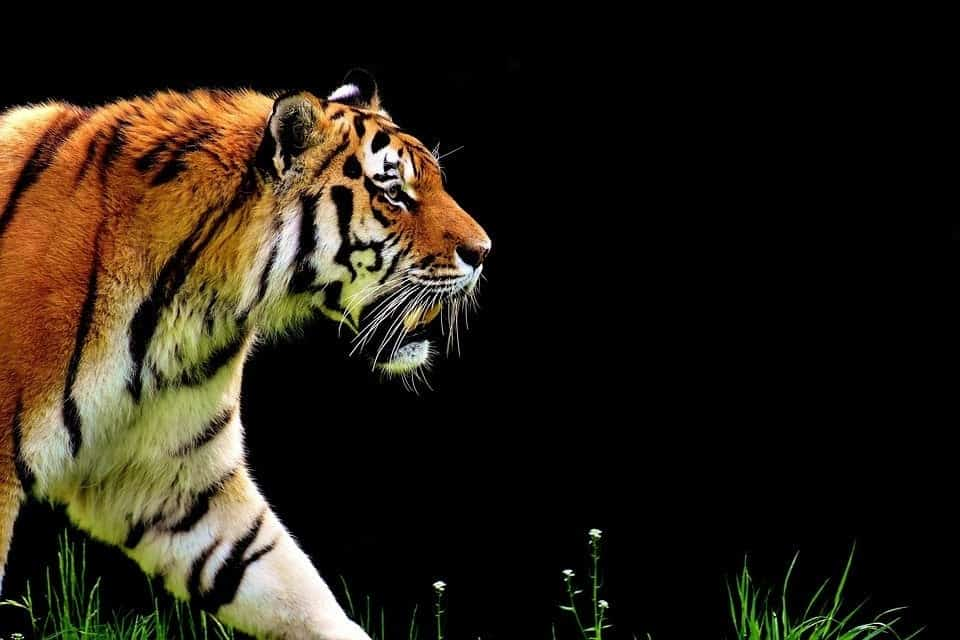

In [4]:
img = cv2.imread('./tiger.jpg')
cv2_imshow(img)
# cv2.waitKey(0)

- 외곽선 검출에서는 색상정보가 필요하지 않으므로 컬러 이미지를 그레이스케일 이미지로 읽어옴

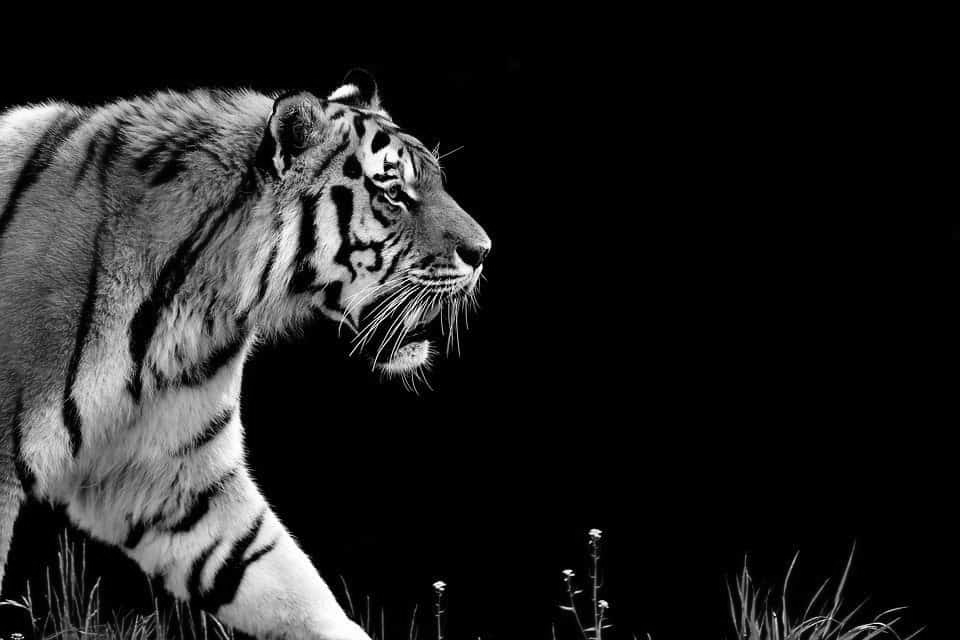

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

- 이미지를 읽은 후 GaussianBlur 기능을 사용하여 흐리게 처리
    - 이미지의 노이즈를 줄이기 위해 수행함
    - 외곽선 검출에서는 픽셀 강도의 수치 미분을 계산해야 하며, 이로 인해 일반적으로 '노이즈' 가장자리가 발생함
    - 즉, 이미지에서 인접한 픽셀(특히 가장자리 근처)의 강도가 크게 변하여 우리가 찾고 있는 주요 가장자리 구조를 나타내지 않는 가장자리가 발생할 수 있음
    - 흐리게 처리하면 가장자리 근처의 강도 변화가 부드러워져 이미지 내에서 우세한 가장자리 구조를 더 쉽게 식별할 수 있음

- 예제에서는 흐릿함의 정도를 지정하는 컨볼루션 커널(이 경우 3x3 커널)의 크기를 사용

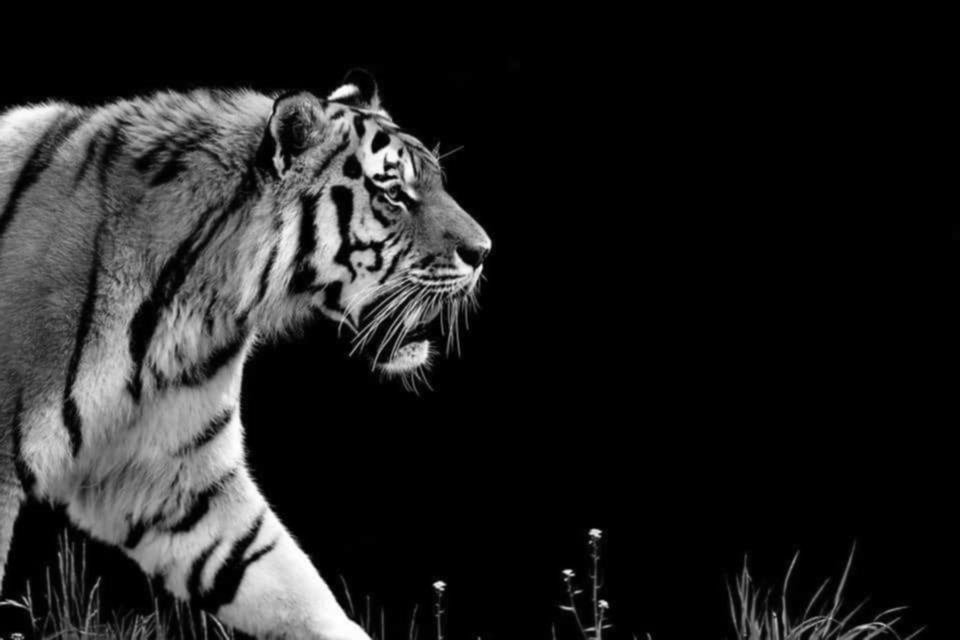

In [6]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
cv2_imshow(img_blur)

### 3-2. Sobel Edge Detection


- 외곽선 검출에 가장 널리 사용되는 알고리즘의 하나
- 픽셀 강도의 급격환 변화를 이용하여 표시되는 외곽선을 감지함
    - t의 함수로서의 픽셀 강도

<center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/CV002_Edge_Detection_001.png' width="" height ="" /></center><br /><br />

- 강도의 증가는 강도 함수의 1차 도함수를 그려보면 더욱 분명해짐
    - t의 함수로서의 픽셀 강도의 1차 미분

<center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/CV002_Edge_Detection_002.png' width="" height ="" /></center><br /><br />

- 플롯 해석
    - 위의 플롯은 기울기가 특정 임계값보다 높은 영역에서 간선을 감지할 수 있음을 보여줌
    - 또한, 도함수의 갑작스런 변화는 또한 픽셀 강도의 변화를 나타낼 것이므로
    - 이를 염두에두고 3x3 커널을 사용하여 파생 상품을 근사 할 수 있음
    - 하나의 커널을 사용하여 X 방향의 픽셀 강도의 급격한 변화를 감지하고 다른 커널을 Y 방향으로 감지할 수 있음

- Sobel Edge Detection에 사용되는 커널
    - <center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/CV002_Edge_Detection_003.png' width="" height ="" /></center><br /><br />
    - 위의 커널이 원본 이미지와 결합하면 'Sobel 외곽선 이미지'가 생성됨
        - 수직 커널만 사용하는 경우: 컨볼루션은 가장자리가 X 방향으로 강화된 Sobel 이미지를 생성
        - 수평 커널을 사용: 가장자리가 Y 방향으로 강화된 Sobel 이미지를 생성

- $x$와 $y$의 방향에 대한 강도의 기울기를 $G_x$와 $G_y$로 표현함
    - A와 B가 위에 정의된 X 및 Y 커널을 나타내는 경우:
<br><br>
<center>
$G_x = A * I$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$G_y = B * I$
<br>
( $*$ : 합성곱(Convolution) 연산자,
&nbsp;&nbsp;&nbsp;&nbsp;
$I$ : 입력 이미지 )
</center>
<br>
    - 그래디언트 크기의 최종 근사치 $G$
<br><br>
<center>
$G=\sqrt{G_x^2 * G_y^2}$
</center>
<br>
    - 그래디언트 방향의 최종 근사치 $\theta$
<br><br>
<center>
$\theta=arctan({G_y / G_x})$
</center>
<br>

- OpenCV를 사용하여 Sobel 에지 감지를 적용하는 함수
    - Sobel(src, ddepth, dx, dy)
        - Sobel 외곽선 이미지를 양방향(x 및 y)으로 개별 생성
        - 양방향의 복합 기울기는 (xY)
        - 파라미터
            - dx=1이고 dy=0이면 x 방향으로 1차 도함수 Sobel 이미지를 계산
            - dx=1 & dy=1이면 양방향으로 1차 도함수 Sobel 이미지를 계산

In [7]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

- x 방향의 Sobel 이미지가 수직 가장자리(즉, x 방향에서 기울기가 가장 큰 수평 가장자리)를 주로 식별
- y 방향에서 수평 모서리 (즉, y 방향, 수직에서 기울기가 가장 큰 가장자리)를 식별
- 두 이미지에서 호랑이의 줄무늬를 자세히 보면 줄무늬의 강한 수직 가장자리가 x 방향의 Sobel 이미지에서 어떻게 더 분명하게 나타나는지 확인할 수 있음

- 가장자리가 X방향으로 강화된 Sobel 외곽선 이미지

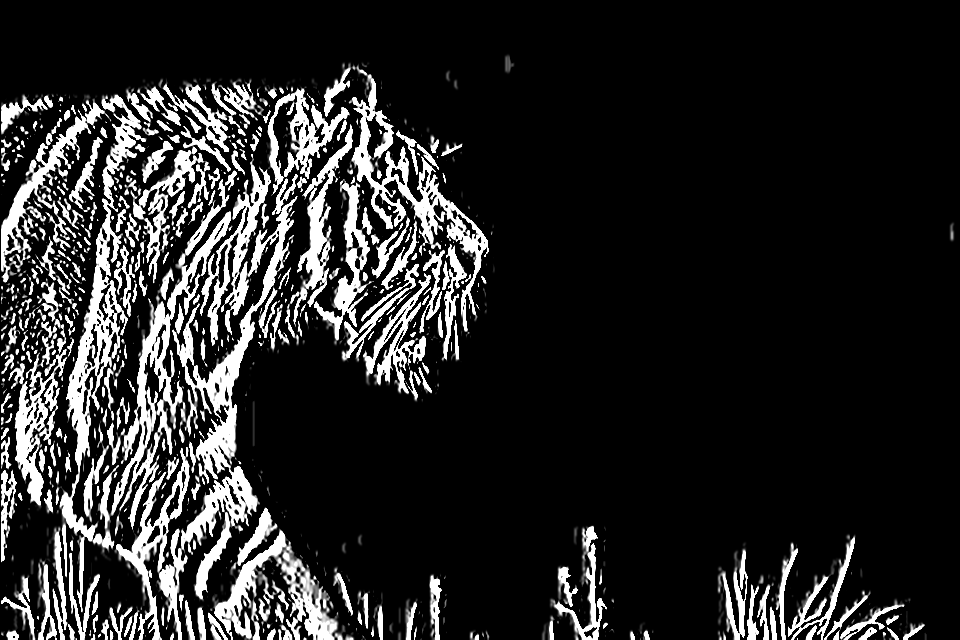

In [8]:
cv2_imshow(sobelx)

- 가장자리가 Y방향으로 강화된 Sobel 외곽선 이미지

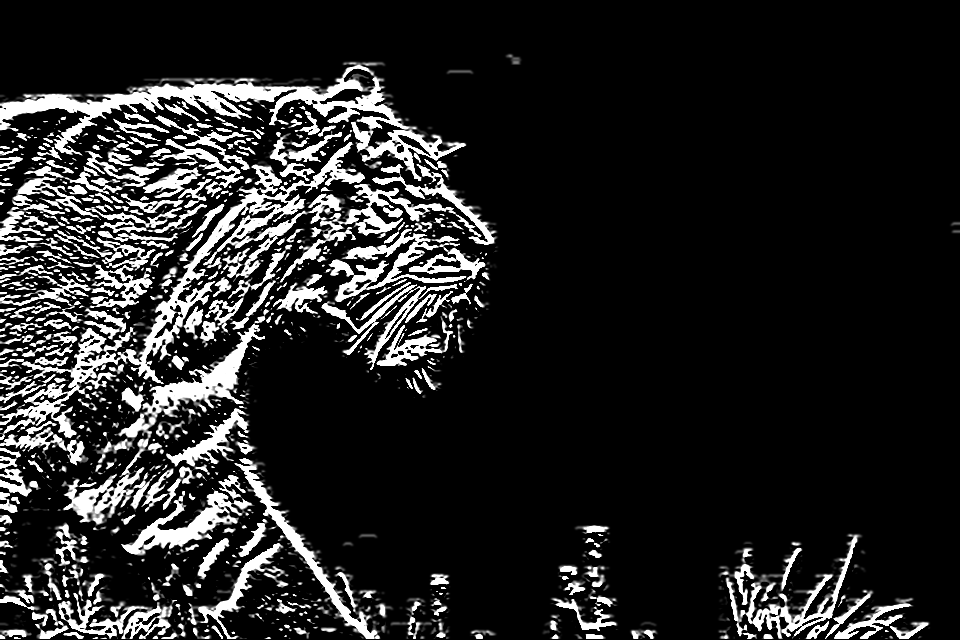

In [9]:
cv2_imshow(sobely)

- XY 방향으로 가장자리가 강화된 Sobel Edge 이미지
    - 양방향의 그라데이션에 대한 Sobel 이미지를 보여줌
    - 원본 이미지를 가장자리 구조 표현으로 추출하여 구조적 무결성이 그대로 유지되도록 함

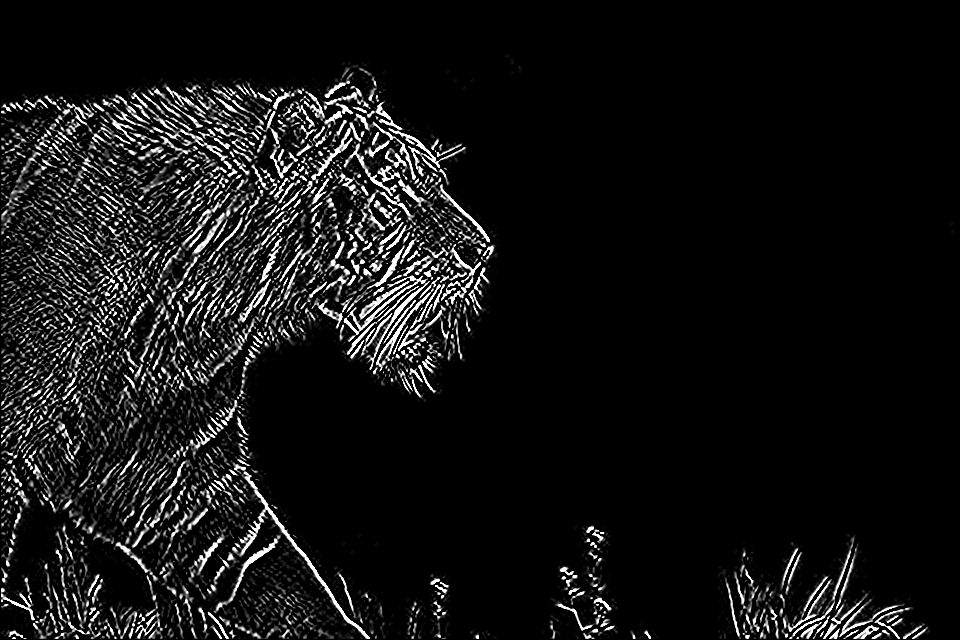

In [10]:
cv2_imshow(sobelxy)

### 3-3. Canny Edge Detection

- Canny Edge Detection은 매우 강력하고 유연하기 때문에 오늘날 가장 널리 사용되는 에지 감지 방법 중 하나
- 알고리즘
    - 이미지에서 가장자리를 추출하는 3단계 프로세스를 따름
    - 여기에 노이즈를 줄이기 위해 필요한 전처리 단계인 이미지 블러링을 추가(다음의 4단계 프로세스를 따름)
        - 잡음 감소
        - 이미지의 강도 기울기 계산
        - 거짓 가장자리 억제
        - 히스테리시스 임계값

#### 3-3-1. 잡음 감소

- Raw 이미지 픽셀은 종종 가장자리에 노이즈가 발생할 수 있으므로 가장자리를 계산하기 전에 노이즈를 줄이는 것이 중요함
- 가우시안 블러 필터는 바람직하지 않은 가장자리로 이어질 수 있는 불필요한 세부 사항을 기본적으로 제거하거나 최소화하는 데 사용됨
- 아래 두 이미지에서
    - 가우시안 블러가 오른쪽 이미지에 적용되었음
    - 원본 이미지보다 약간 흐릿하게 보이지만 가장자리를 계산할 수 있는 상당한 양의 세부 정보를 유지하고 있음

<center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/CV002_Edge_Detection_004.png' width="" height ="" /></center><br /><br />

#### 3-3-2. 이미지의 강도 기울기 계산

- 이미지가 매끄럽게 처리되면(흐리게) Sobel 커널로 가로 및 세로로 필터링됨
- 이러한 필터링 작업의 결과는 각 픽셀의 강도 그라데이션 크기($G$)와 방향($\theta$)을 모두 계산하는 데 사용됨

<center>
$G=\sqrt{G_x^2+G_y^2}$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\theta=tan^{-1}({{G_x}\over{G_y}})$
</center>

- 그런 다음 그라데이션 방향이 가장 가까운 45도 각도로 반올림되면
- 아래 그림(오른쪽)과 같이 결합된 처리 단계의 결과를 보여줌

<center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/CV002_Edge_Detection_005.png' width="" height ="" /></center><br /><br />

#### 3-3-3. 거짓 가장자리 억제

- 노이즈를 줄이고 강도 그라데이션을 계산한 후
- 가장자리의 최대 억제가 아닌 기술을 사용하여 원치 않는 픽셀(실제로 가장자리를 구성하지 않을 수 있음)을 필터링함
- 각 픽셀은 양 또는 음의 기울기 방향으로 인접한 픽셀과 비교함
    - 현재 픽셀의 그래디언트 크기가 인접 픽셀보다 크면 변경되지 않은 상태로 유지
    - 그렇지 않으면 현재 픽셀의 크기가 0으로 설정
- 예시
    - 호랑이의 털과 관련된 수많은 '가장자리'가 상당 부분 처리됨

<center><img src='https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/images/CV002_Edge_Detection_006.png' width="" height ="" /></center><br /><br />

#### 3-3-4. 히스테리시스 임계값

- Canny Edge Detection의 마지막 단계
- 그래디언트 크기를 두 개의 임계값과 비교함. 이 임계값은 다른 임계값보다 작게 설정
    - 그래디언트 크기 값이 더 큰 임계값보다 크면 해당 픽셀은 단색 가장자리와 연결되고 최종 가장자리 맵에 포함됨
    - 그래디언트 크기 값이 더 작은 임계값보다 작으면 픽셀이 억제되고 최종 가장자리 맵에서 제외됨
    - 그래디언트 크기가 이 두 임계값 사이에 있는 다른 모든 픽셀은 '약한' 가장자리로 표시됨(즉, 최종 가장자리 맵에 포함될 후보가 됨)
    - '약한' 픽셀이 솔리드 에지와 연결된 픽셀에 연결되면 최종 외곽선 맵에도 포함됨

#### 3-3-5. Canny Edge Detection을 적용하는 구문

- Canny(image, threshold1, threshold2)
    - Canny Edge Detection 알고리즘에서 사용하는 두 가지 임계값을 제공하고 OpenCV는 모든 구현 세부 정보를 처리함
    - Canny() 함수를 호출하기 전에 이미지를 흐리게 처리하는 것이 중요함(적극 권장되는 전처리 단계)

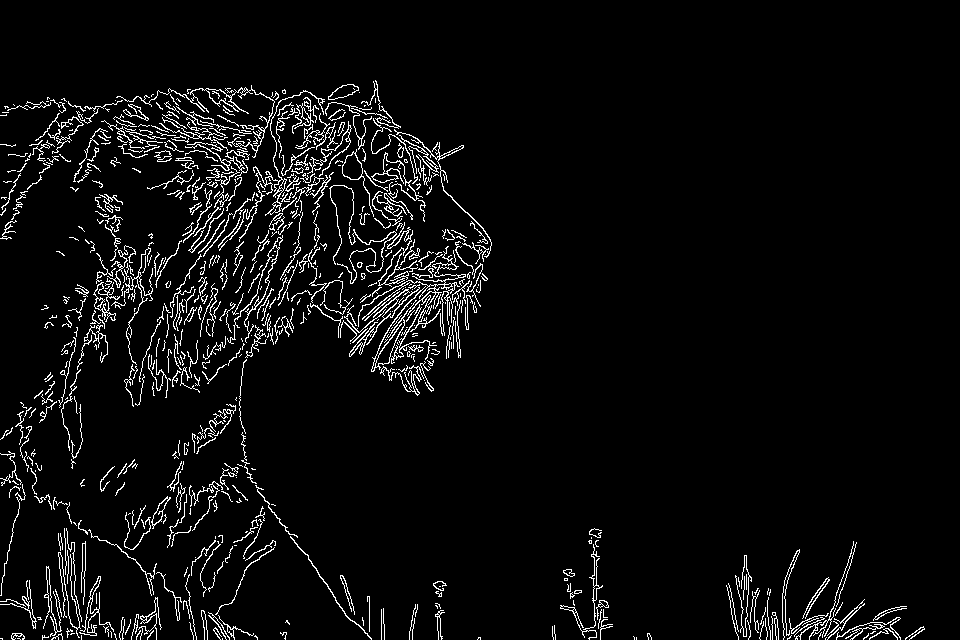

In [11]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
cv2_imshow(edges)

- Canny Edge Detection은 Sobel Edge Detection뿐만 아니라 Non-Maximum Suppression 및 Hysteresis Thresholding을 사용하기 때문에 최상의 결과를 제공함